## Extraction of interior pixels of a contour.

Load necessary packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Preprocess the image
- Read an image
- Convert it to gray scale image
- Apply binary threshold or canny edge detection to get better result on contour detection

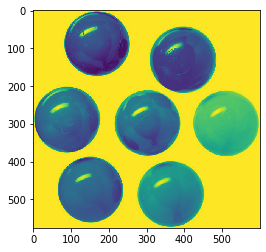

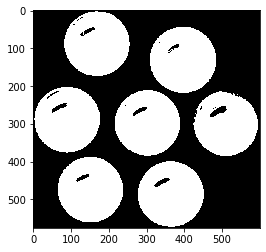

In [2]:
# Reading an image
file_name = 'images/test2.jpg'
image = cv2.imread(file_name)

# Converting image color BGR to GRAY 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray) # display the gray image
plt.show()

# Using binary threshold
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap = 'gray') # display the threshold image
plt.show()


Find the contours

In [15]:
# Finding the contours 
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours: %d" %(len(contours)) )

Number of contours: 68


Find pixels of each contour

    For each of the contour
     - create a mask with image height, width
     - draw contour on the mask
     - find the coordinates of pixels
     - extract pixels from the image with help of coordinates

In [16]:
# Finding the pixels inside of the contours
contours_px = []

for i, contour in enumerate(contours):
    # Create numpy array with image height and width
    mask = np.zeros(gray.shape[:2], dtype=np.uint8)
    
    # Draw the contour on the mask 
    cv2.drawContours(mask, contours, i , color=255, thickness=cv2.FILLED) 
    
    # Find the coordinates of pixels and pixels
    px = np.where(mask==255) # get the (x,y) position of each pixel which has value 255
    
    # Extract coordinates value from the image
    contours_px.append( gray[px[0],px[1]] ) # store pixels into the list


In [17]:
contours_px[0]

array([193, 190, 186, ..., 189, 195, 200], dtype=uint8)

In [18]:
contours_px[0]

array([193, 190, 186, ..., 189, 195, 200], dtype=uint8)